## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 09 : Algoritma Partisi </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [3]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Ragil Muhamad Ramadhan"
myNIM = "58511"

In [4]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Start: 		2023-11-08 22:52:13.218228
Device ID: 	c88b4108-7e4e-11ee-a8bb-9ffe4729e5ab



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset1]
2. [Nama dataset2] – sumber : [cantumkan link dataset2]

---

### Hasil kerja

#### Importing system library

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

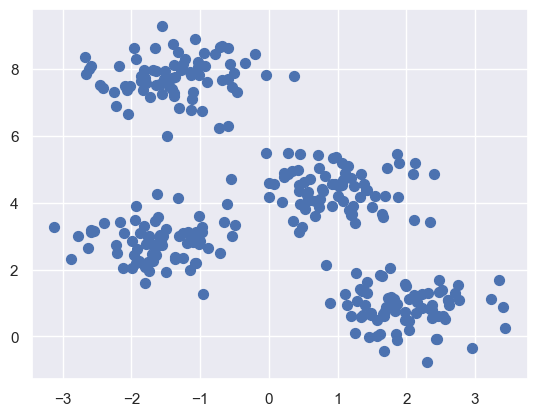

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50);

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


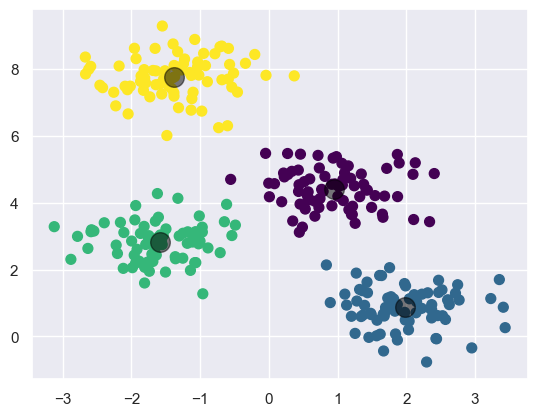

In [6]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);

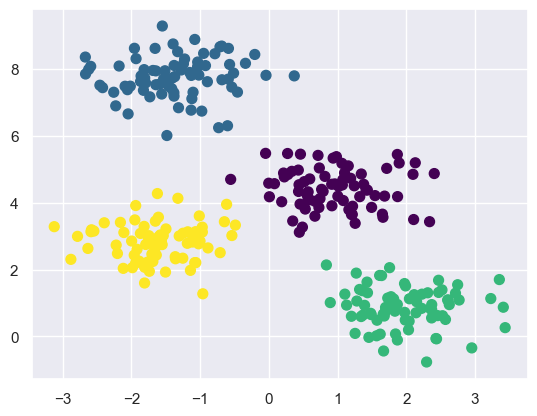

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='viridis')

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


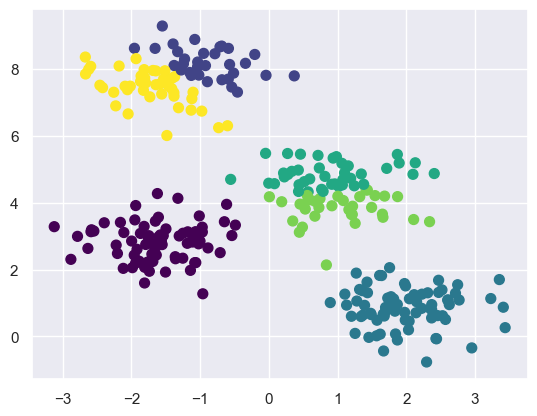

In [8]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='viridis');

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


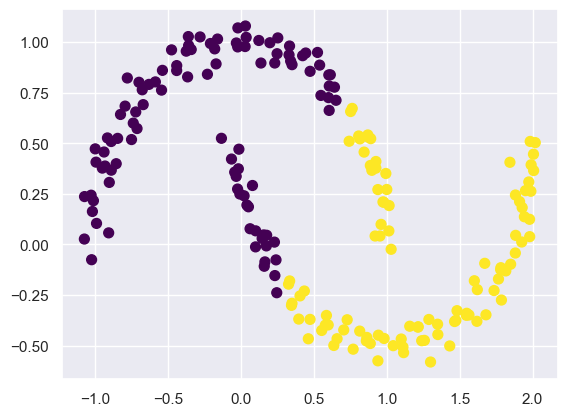

In [10]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='viridis');

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


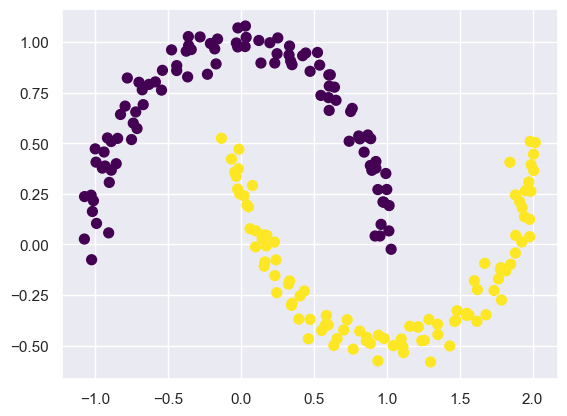

In [11]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='viridis');

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

C:\Users\ragil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

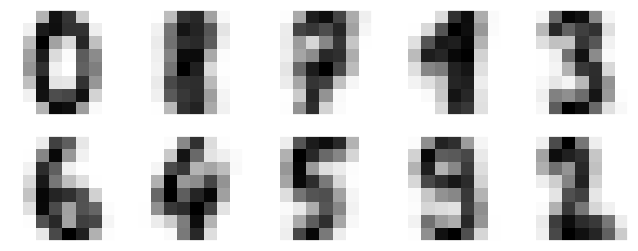

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [15]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

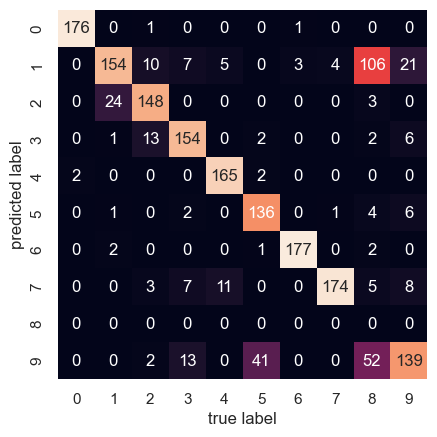

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

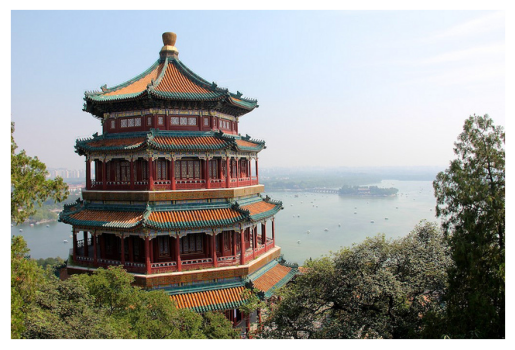

In [18]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [19]:
china.shape

(427, 640, 3)

In [20]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20);

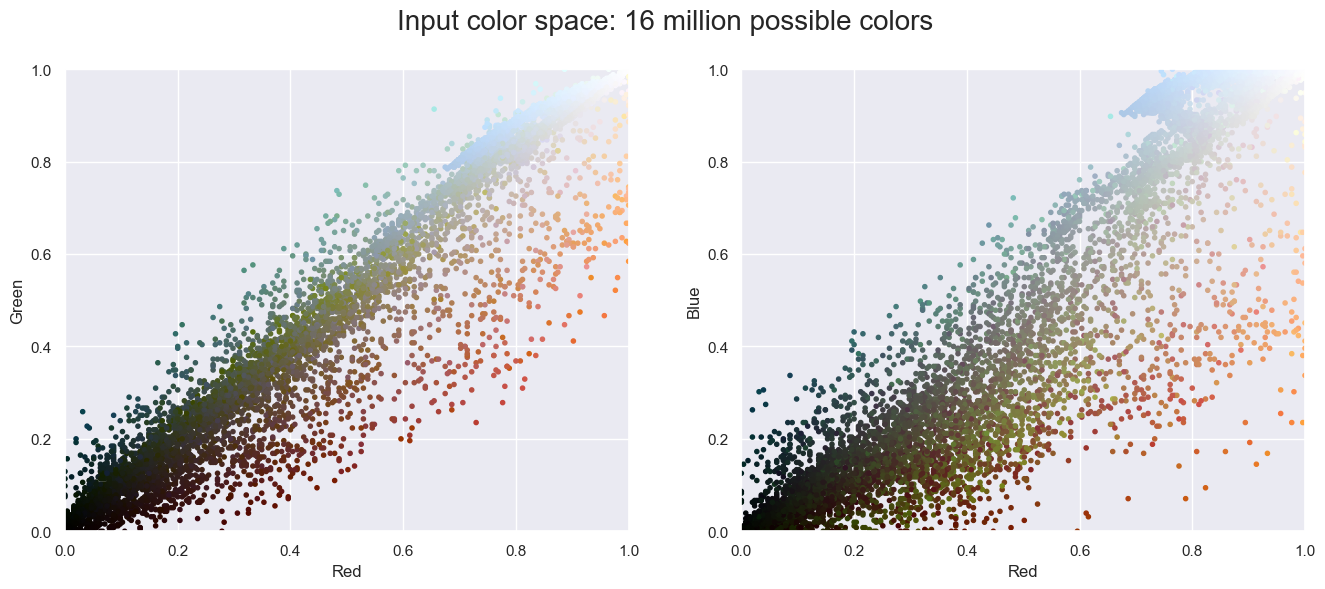

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

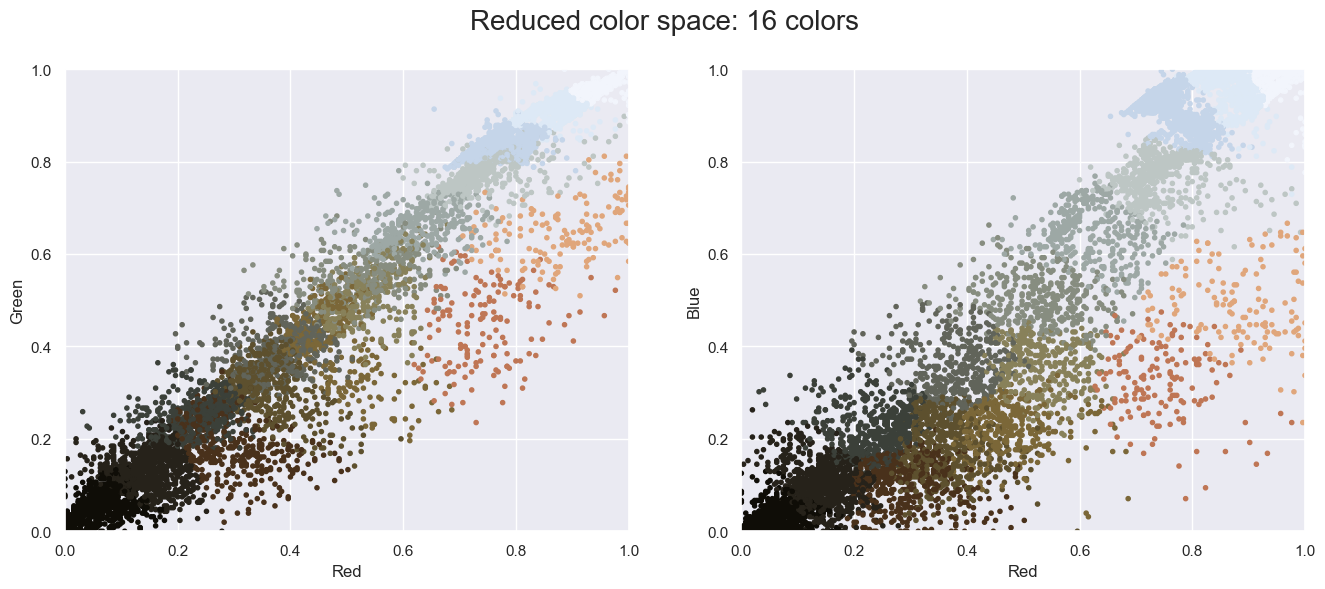

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
              title="Reduced color space: 16 colors")

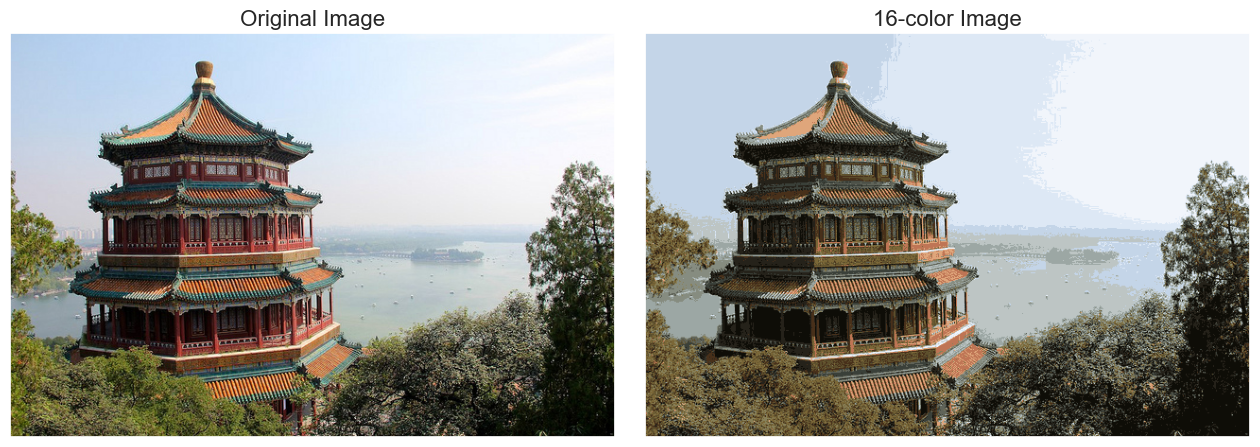

In [24]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6),
                        subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [26]:
#Dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

target = iris.target_names
labels = iris.target

In [27]:
#Scalling
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [28]:
#PCA transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k = 3
datapoints

array([[-6.30702931e-01,  1.07577910e-01, -1.87190977e-02],
       [-6.22904943e-01, -1.04259833e-01, -4.91420253e-02],
       [-6.69520395e-01, -5.14170597e-02,  1.96441728e-02],
       [-6.54152759e-01, -1.02884871e-01,  2.32185515e-02],
       [-6.48788056e-01,  1.33487576e-01,  1.51155243e-02],
       [-5.35272778e-01,  2.89615724e-01,  2.54378874e-02],
       [-6.56537790e-01,  1.07244911e-02,  9.18347789e-02],
       [-6.25780499e-01,  5.71335411e-02, -1.40277647e-02],
       [-6.75643504e-01, -2.00703283e-01,  3.59520802e-02],
       [-6.45644619e-01, -6.72080097e-02, -6.17055833e-02],
       [-5.97408238e-01,  2.17151953e-01, -5.12740810e-02],
       [-6.38943190e-01,  3.25988375e-02,  2.44981902e-02],
       [-6.61612593e-01, -1.15605495e-01, -5.47803418e-02],
       [-7.51967943e-01, -1.71313322e-01,  4.76777938e-02],
       [-6.00371589e-01,  3.80240692e-01, -8.51695344e-02],
       [-5.52157227e-01,  5.15255982e-01,  3.82732690e-02],
       [-5.77053593e-01,  2.93709492e-01

In [29]:
#Visualization
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

<Figure size 800x600 with 0 Axes>

In [30]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)
medoids_initial

array([[-0.60037159,  0.38024069, -0.08516953],
       [-0.15863457, -0.28913985,  0.0524159 ],
       [ 0.21396272,  0.059963  , -0.11409813]])

In [31]:
def compute_d_p(X, medoids, p) :
    m = len(X)
    medoids_shape = medoids.shape
    if len(medoids_shape) == 1 :
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    S = np.empty((m, k))
    for i in range(m) :
        d_i = np.linalg.norm(X[i, :] - medoids, ord = p, axis = 1)
        S[i, :] = d_i**p
    return S

S = compute_d_p(datapoints, medoids_initial, 2)
S

array([[0.07968064, 0.3852937 , 0.7248244 ],
       [0.23654649, 0.26004161, 0.73153592],
       [0.20209589, 0.31859043, 0.81083493],
       [0.2480507 , 0.28108167, 0.79899978],
       [0.07328835, 0.42025569, 0.76644093],
       [0.02468474, 0.47754216, 0.6335645 ],
       [0.17102739, 0.33938008, 0.80260393],
       [0.11010499, 0.34254533, 0.71519075],
       [0.35783221, 0.27539032, 0.88186121],
       [0.20281054, 0.29945624, 0.75784222],
       [0.02775562, 0.45960533, 0.68697806],
       [0.13436964, 0.33499155, 0.74740623],
       [0.2505374 , 0.29459209, 0.80097502],
       [0.3448417 , 0.36595003, 1.01268223],
       [0.        , 0.66213165, 0.76655503],
       [0.03579188, 0.80211274, 0.81744851],
       [0.02127369, 0.51529454, 0.70108133],
       [0.08302796, 0.35731766, 0.68556492],
       [0.01509555, 0.47944961, 0.59289047],
       [0.0437377 , 0.46409076, 0.73404497],
       [0.0792879 , 0.33420167, 0.59754411],
       [0.06094364, 0.39785527, 0.67347669],
       [0.

In [32]:
def assign_labels(S) :
    return np.argmin(S, axis = 1)

labels = assign_labels(S)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [33]:
def update_medoids(X, medoids, p):
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)

    out_medoids = medoids
    
    costs = np.sum(S, axis=1)
    for i in set(labels):
    
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))
    
        cluster_points = datapoints[labels == i]
    
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p))
    
            if new_dissimilarity < avg_dissimilarity:
                avg_dissimilarity = new_dissimilarity
    
                out_medoids[i] = datap

    return out_medoids

In [34]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [35]:
#Full Algortihm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids

    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(datapoints, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(datapoints, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]
final_medoids

array([[-0.50609386,  0.02794708,  0.02628302],
       [-0.00826092, -0.0866611 ,  0.05357911],
       [ 0.03302937, -0.04297085,  0.01560933]])

In [36]:
#Counts
def mark_matches(a, b, exact=False):
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes =tuple(range(len(a.shape)))
    assert ((a_int == 0)| (a_int == 1)|(a_int == 2)).all()
    assert ((b_int == 0)| (b_int == 1)|(b_int == 2)).all()

    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches
    
    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if(2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False

In [37]:
def count_matches(a, b, exact=False):
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches,
      "matcehs out of",
      len(data), "data points",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

142 matcehs out of 150 data points (~ 94.7%)


In [38]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#importing all required packages
import numpy as np
import pandas as pd

#Data via lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [39]:
bank = pd.read_csv('bankmarketing.csv')
bank.head()

FileNotFoundError: [Errno 2] No such file or directory: 'bankmarketing.csv'

In [ ]:
bank.columns

In [ ]:
# Importing Categorical Columns
bank_cust = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_cust.head()

In [ ]:
# Converting Categorical Columns to Numerical
bank_cust['age_bin'] = pd.cut(x=bank_cust['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                              labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70',
                                      '70-80', '80-90', '90-100'], right=False)
bank_cust = bank_cust.drop('age', axis=1)
bank_cust.head()

In [ ]:
bank_cust.shape

In [ ]:
bank_cust.describe()

In [ ]:
bank_cust.isnull().sum()*100/bank_cust.shape[0]

In [ ]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

NameError: name 'bank_cust' is not defined

In [41]:
# !pip install kmodes


In [42]:
# pip install -- upgrade kmodes

In [43]:
#importing Libraries
from kmodes.kmodes import KModes

ModuleNotFoundError: No module named 'kmodes'

In [51]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 413, cost: 27939.0


In [52]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [53]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [54]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,campaign,duration,campaign,pdays,previous,poutcome,age_bin
0,4,1,1,0,1,0,0,8,0,119,0,0,0,3,2
1,1,1,0,0,0,0,2,6,1,37,1,0,0,3,3


In [55]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 795, cost: 27306.0
Run 1, iteration: 2/100, moves: 1, cost: 27306.0


In [56]:
# Predicted clusters
fitClusters_huang

array([1, 1, 1, ..., 0, 1, 0], dtype=uint16)

In [57]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 30197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 413, cost: 27939.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 838, cost: 26091.0
Run 1, iteration: 2/100, moves: 393, cost: 26091.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 871, cost: 24976.0
Run 1, iteration: 2/100, moves: 382, cost: 24976.0


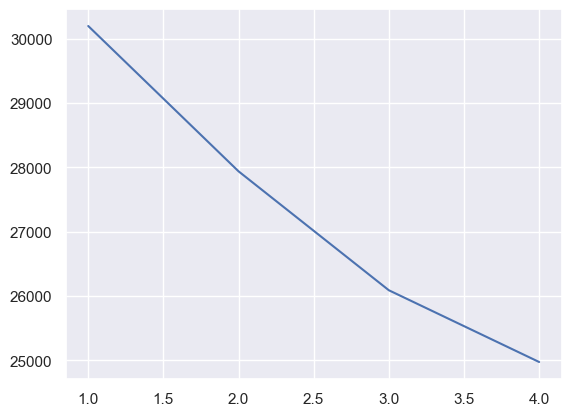

In [58]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [59]:
# Choosing K=2
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 413, cost: 27939.0


In [60]:
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [61]:
bank_cust = bank_cust_copy.reset_index()

In [62]:
clusterDF = pd.DataFrame(fitClusters_cao)
clusterDF.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clusterDF], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [63]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,campaign,duration,campaign,pdays,previous,poutcome,age_bin,cluster_predicted
0,unemployed,married,primary,no,no,no,cellular,oct,1,79,1,-1,0,unknown,30-40,0
1,services,married,secondary,no,yes,yes,cellular,may,1,220,1,339,4,failure,30-40,0
2,management,single,tertiary,no,yes,no,cellular,apr,1,185,1,330,1,failure,30-40,0
3,management,married,tertiary,no,yes,yes,unknown,jun,4,199,4,-1,0,unknown,30-40,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,1,226,1,-1,0,unknown,50-60,0


In [64]:
cluster_0 = combinedDf[combinedDf.cluster_predicted == 0]
cluster_1 = combinedDf[combinedDf.cluster_predicted == 1]

In [65]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 4519
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                3450 non-null   object  
 1   marital            3450 non-null   object  
 2   education          3450 non-null   object  
 3   default            3450 non-null   object  
 4   housing            3450 non-null   object  
 5   loan               3450 non-null   object  
 6   contact            3450 non-null   object  
 7   month              3450 non-null   object  
 8   campaign           3450 non-null   int64   
 9   duration           3450 non-null   int64   
 10  campaign           3450 non-null   int64   
 11  pdays              3450 non-null   int64   
 12  previous           3450 non-null   int64   
 13  poutcome           3450 non-null   object  
 14  age_bin            3450 non-null   category
 15  cluster_predicted  3450 non-null   uint16  
dtypes: cat

In [66]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 8 to 4520
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                1071 non-null   object  
 1   marital            1071 non-null   object  
 2   education          1071 non-null   object  
 3   default            1071 non-null   object  
 4   housing            1071 non-null   object  
 5   loan               1071 non-null   object  
 6   contact            1071 non-null   object  
 7   month              1071 non-null   object  
 8   campaign           1071 non-null   int64   
 9   duration           1071 non-null   int64   
 10  campaign           1071 non-null   int64   
 11  pdays              1071 non-null   int64   
 12  previous           1071 non-null   int64   
 13  poutcome           1071 non-null   object  
 14  age_bin            1071 non-null   category
 15  cluster_predicted  1071 non-null   uint16  
dtypes: cat

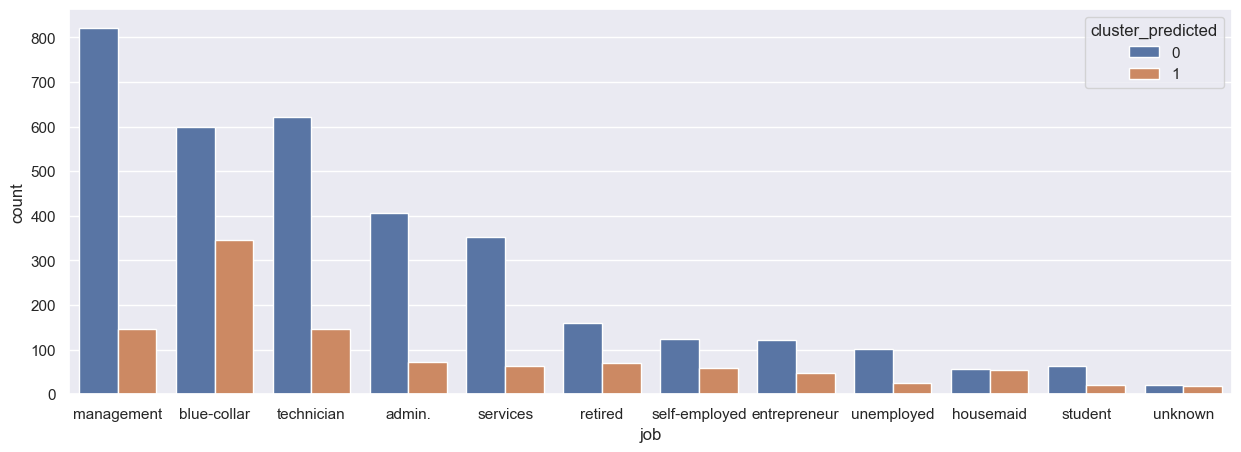

In [70]:
# Job
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'], order=combinedDf['job'].value_counts().index, hue=combinedDf['cluster_predicted'])
plt.show()

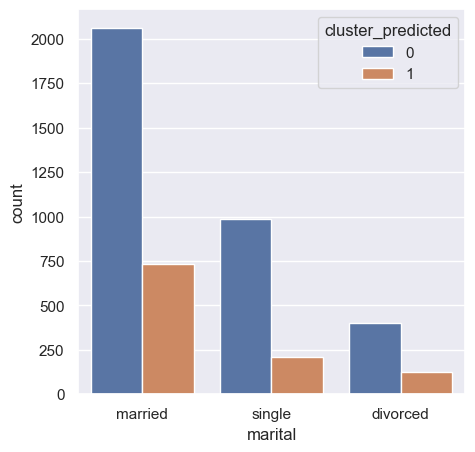

In [71]:
# Marital
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'], order=combinedDf['marital'].value_counts().index, hue=combinedDf['cluster_predicted'])
plt.show()

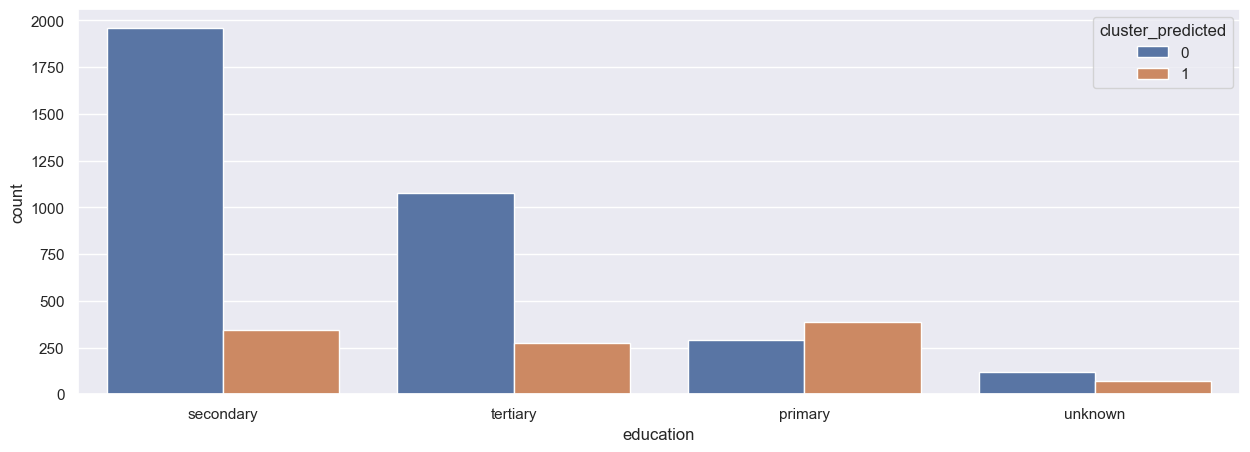

In [72]:
# Education
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'], order=combinedDf['education'].value_counts().index, hue=combinedDf['cluster_predicted'])
plt.show()

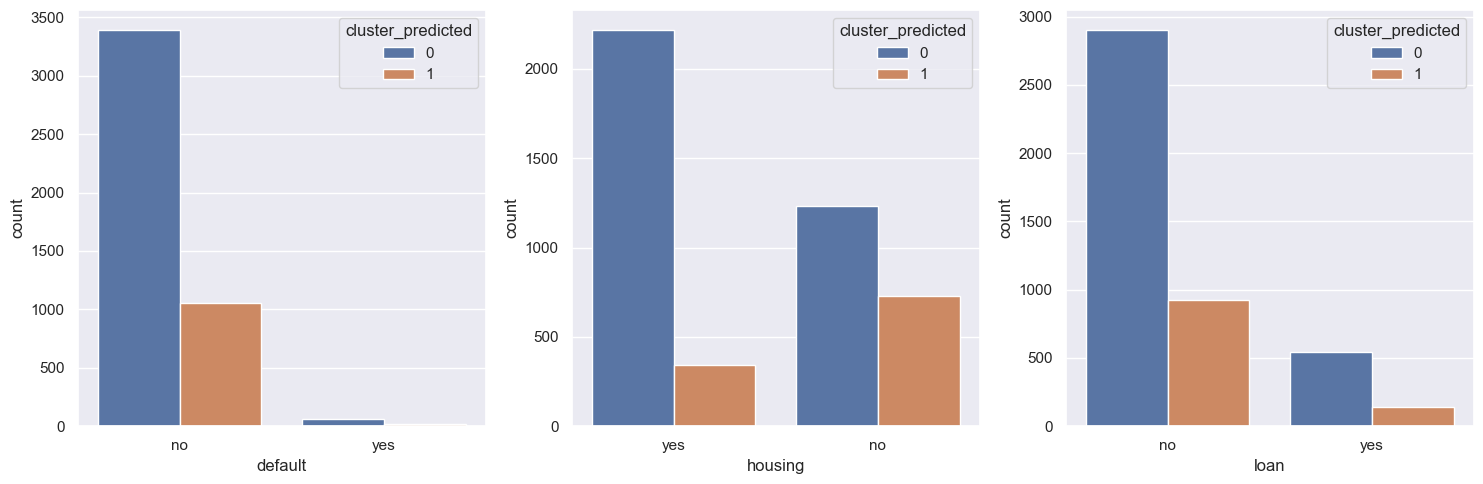

In [73]:
# Default
f, axs = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=combinedDf['default'], order=combinedDf['default'].value_counts().index, hue=combinedDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=combinedDf['housing'], order=combinedDf['housing'].value_counts().index, hue=combinedDf['cluster_predicted'], ax=axs[1])
sns.countplot(x=combinedDf['loan'], order=combinedDf['loan'].value_counts().index, hue=combinedDf['cluster_predicted'], ax=axs[2])

plt.tight_layout()
plt.show()

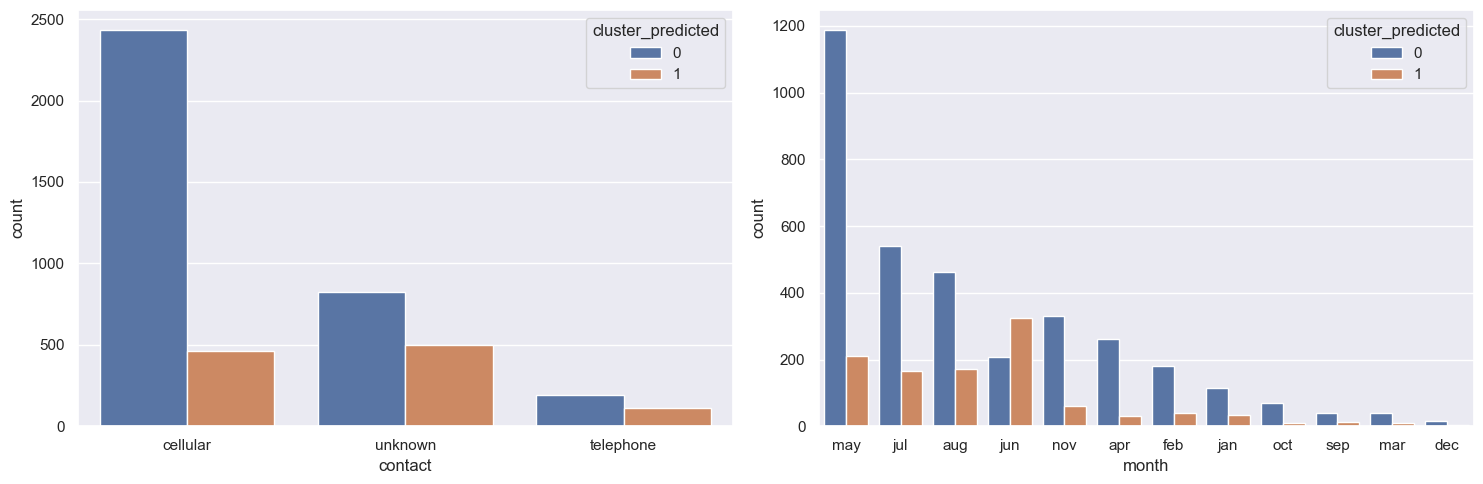

In [74]:
f, axs = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=combinedDf['contact'], order=combinedDf['contact'].value_counts().index, hue=combinedDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=combinedDf['month'], order=combinedDf['month'].value_counts().index, hue=combinedDf['cluster_predicted'], ax=axs[1])

plt.tight_layout()
plt.show()

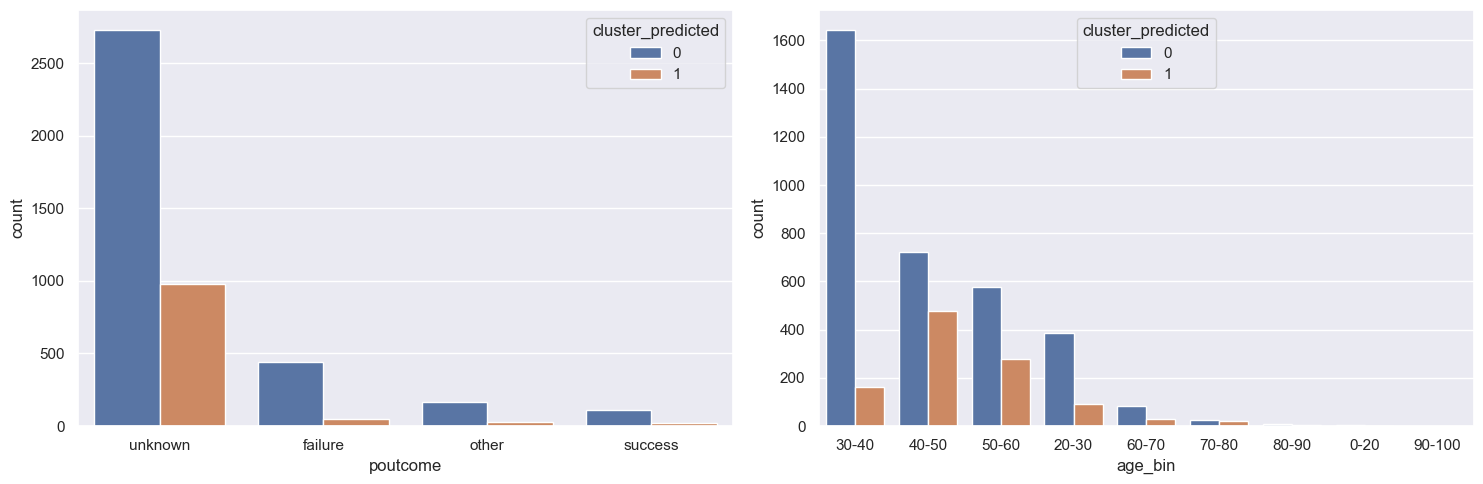

In [75]:
f, axs = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=combinedDf['poutcome'], order=combinedDf['poutcome'].value_counts().index, hue=combinedDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=combinedDf['age_bin'], order=combinedDf['age_bin'].value_counts().index, hue=combinedDf['cluster_predicted'], ax=axs[1])

plt.tight_layout()
plt.show()

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

---

In [5]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Time-stamp:	2023-11-08 22:52:18.507304


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [10]:
!jupyter nbconvert --to html "./IF540_EL_Laporan_09_58511_Ragil Muhamad Ramadhan.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_EL_Laporan_09_58511_Ragil Muhamad Ramadhan.ipynb to html
[NbConvertApp] Writing 3983412 bytes to IF540_EL_Laporan_09_58511_Ragil Muhamad Ramadhan.html
